# Visualizing statistical relationships
## Agenda

- seabornのAPIを活用して、data visualizationを習得する

## 参考

- https://seaborn.pydata.org/tutorial.html

In [1]:
## create the clean environment
import gc
import matplotlib.pyplot as plt

def clear_all():
    # Clears all the variables from the workspace
    gl = globals().copy()
    for var in gl:
        if var in clean_env_var: continue
        del globals()[var]
    # Garbage collection:
    gc.collect()

def close_plots():
  my_plots = plt.get_fignums()
  for j in my_plots:
    plt.close(plt.figure(j))

clean_env_var = dir()
clean_env_var.append('clean_env_var')

### Hardware

In [2]:
%%bash
system_profiler SPHardwareDataType | grep -E \
"Model Identifier"\|"Processor Name"\|"Processor Speed"\
\|"Number of Processors"\|"Memory:"

      Model Identifier: MacBookPro13,1
      Processor Name: Dual-Core Intel Core i5
      Processor Speed: 2 GHz
      Number of Processors: 1
      Memory: 16 GB


### Python

In [3]:
!python -V

Python 3.7.4


### version update

In [4]:
#!pip install -U seaborn

### Import

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

### seaborn version

In [6]:
sns.__version__

'0.10.1'

## はじめに： なぜData visualizationは重要なのか？

- statistical analysisは変数間の関係性を理解する手法
- 適切なData visualizationを実施することで、人間の脳でも簡単に変数間の関係性が理解しやすくなる

## 1. Relating variables with scatter plots

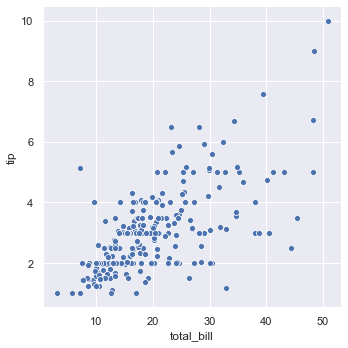

In [7]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

### 次元の追加

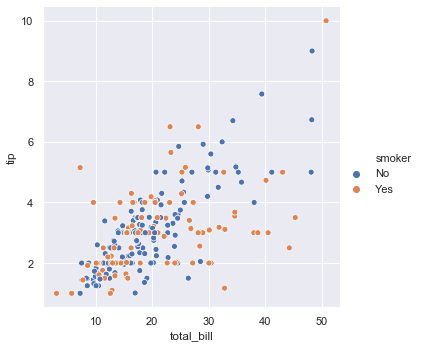

In [8]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

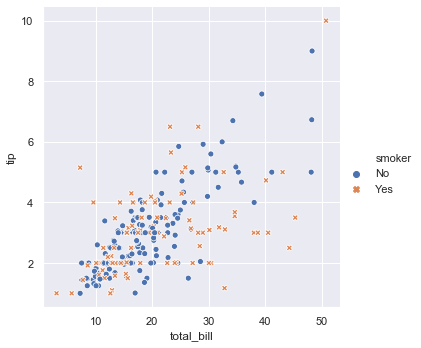

In [9]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

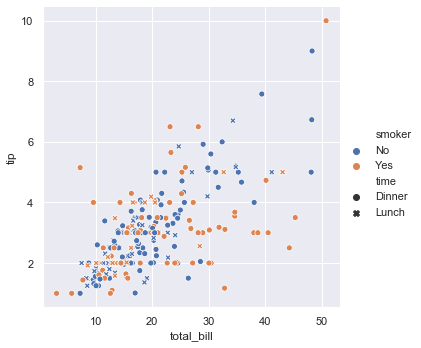

In [10]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

### Colorのカスタマイズ

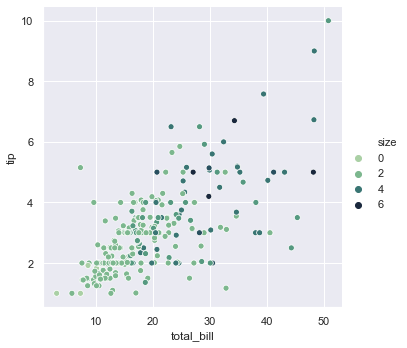

In [11]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);

### Sizeのカスタマイズ

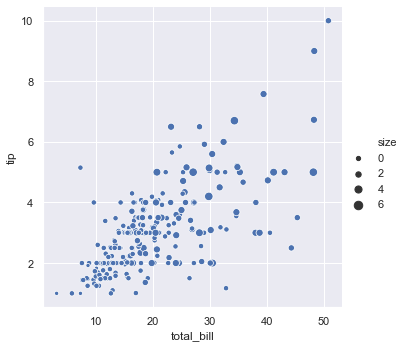

In [12]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

## 2. Emphasizing continuity with line plots

In [13]:
np.random.seed(42)
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
df

,time,value
0,0,0.496714
1,1,0.358450
2,2,1.006138
3,3,2.529168
4,4,2.295015
...,...,...
495,495,6.905000
496,496,5.867754
497,497,5.677415
498,498,4.801797


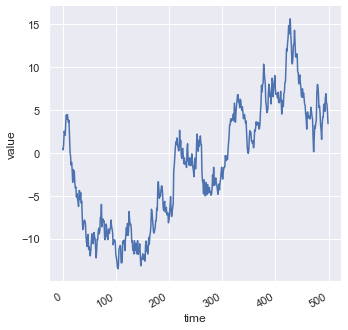

In [14]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate() ## X 軸の目盛りラベルテキストを回転

#### REMARKS

- `lineplot()`は x valueに基づいてデータをsortしてからplotする仕様がデフォルトとなっている


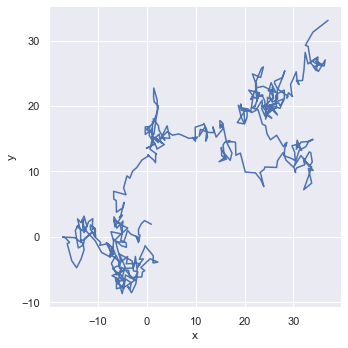

In [15]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

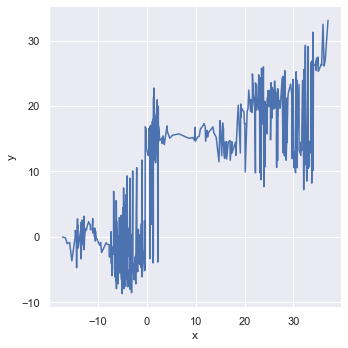

In [16]:
sns.relplot(x="x", y="y", kind="line", data=df);

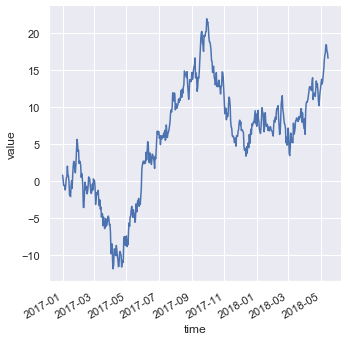

In [17]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

## 3. Aggregation and representing uncertainty

一つのx valueに対してyが複数の値で観測される時、`sns.relplot()`は meanとconfidence interval 95% (bootstrapingで計算) を返してplotしてくれる


In [18]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


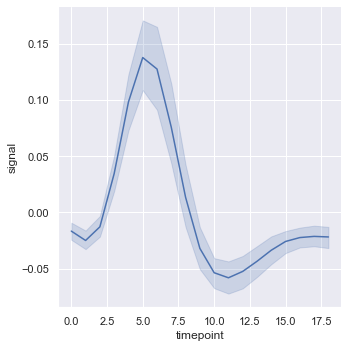

In [19]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

confidence intervalを消したいときは

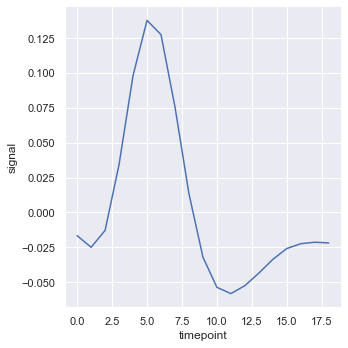

In [20]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

standard deviationでplot

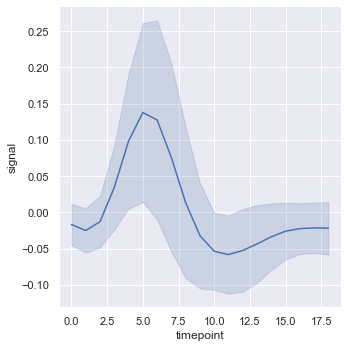

In [21]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

## 4. Plotting subsets of data with semantic mappings

hueを追加してplotしたい場合は

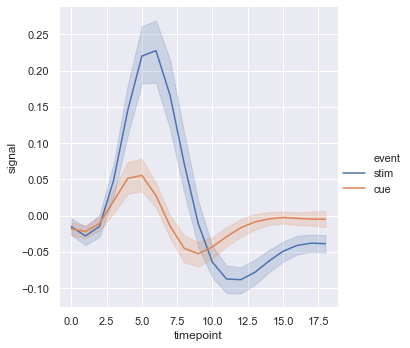

In [22]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

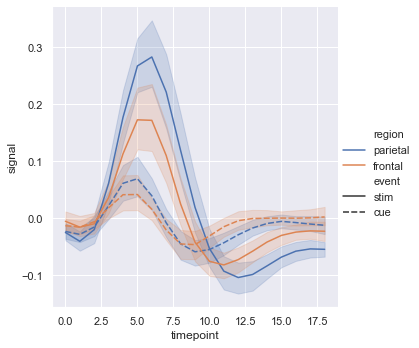

In [23]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

## 5. Showing multiple relationships with facets

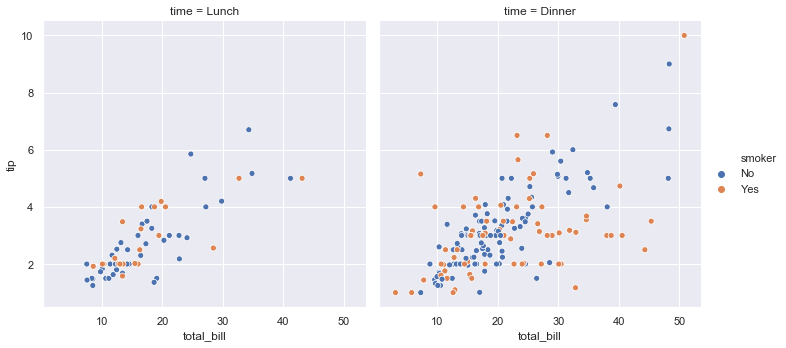

In [24]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

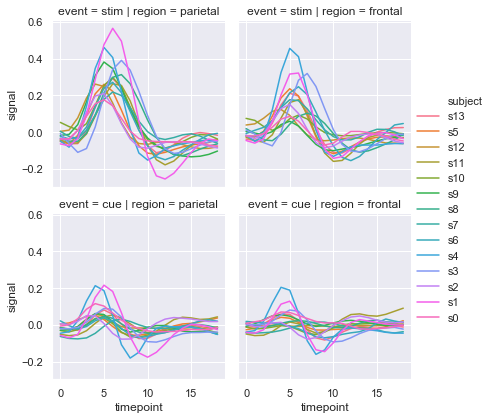

In [25]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

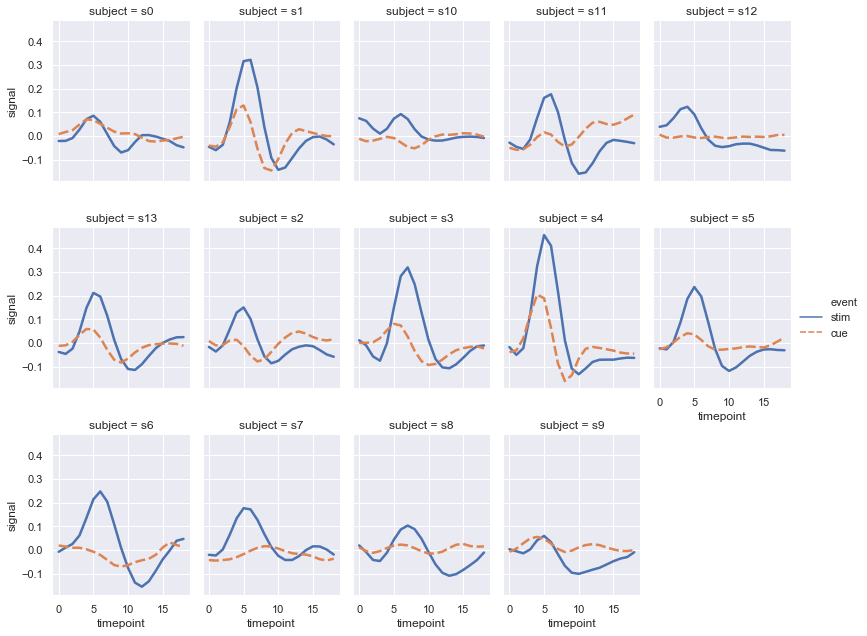

In [26]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'").sort_values('subject'));